In [66]:
import requests

page = requests.get("https://en.wikipedia.org/wiki/Portal:Current_events")

print(page.status_code)

# print(page.content)

200


In [67]:
from bs4 import BeautifulSoup
import requests 

page = requests.get("https://en.wikipedia.org/wiki/Portal:Current_events")

soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# list(soup.children)

object = soup.find(id="mw-content-text")

items = object.find_all(class_="current-events-content description")
# items.find('a')

div_list = [div for div in soup.find_all('div', class_="current-events-content description")]
p_list = [div.find_all('li') for div in div_list]
content = [item.text.strip() for p in p_list for item in p]
unique_content = list(set(content))
# print(unique_content)
# result = items[0]
# print(soup.find_all('div'))

# print(soup.find_all('p')[0].get_text())

# print(result.prettify())

In [68]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

words = []

for item in unique_content:
    words += word_tokenize(item)
words = [w.lower() for w in words]
    

words = [w for w in words if w not in stopwords.words('english')]
words = [w for w in words if w.isalnum()]

In [69]:
# words

In [71]:
from wordcloud import WordCloud


unique_string=(" ").join(words)
# print(unique_string)


wordcloud = WordCloud(width = 2000, height = 1000, background_color="white").generate(unique_string)
wordcloud.to_file("word_cloud_wiki_current_events.png")

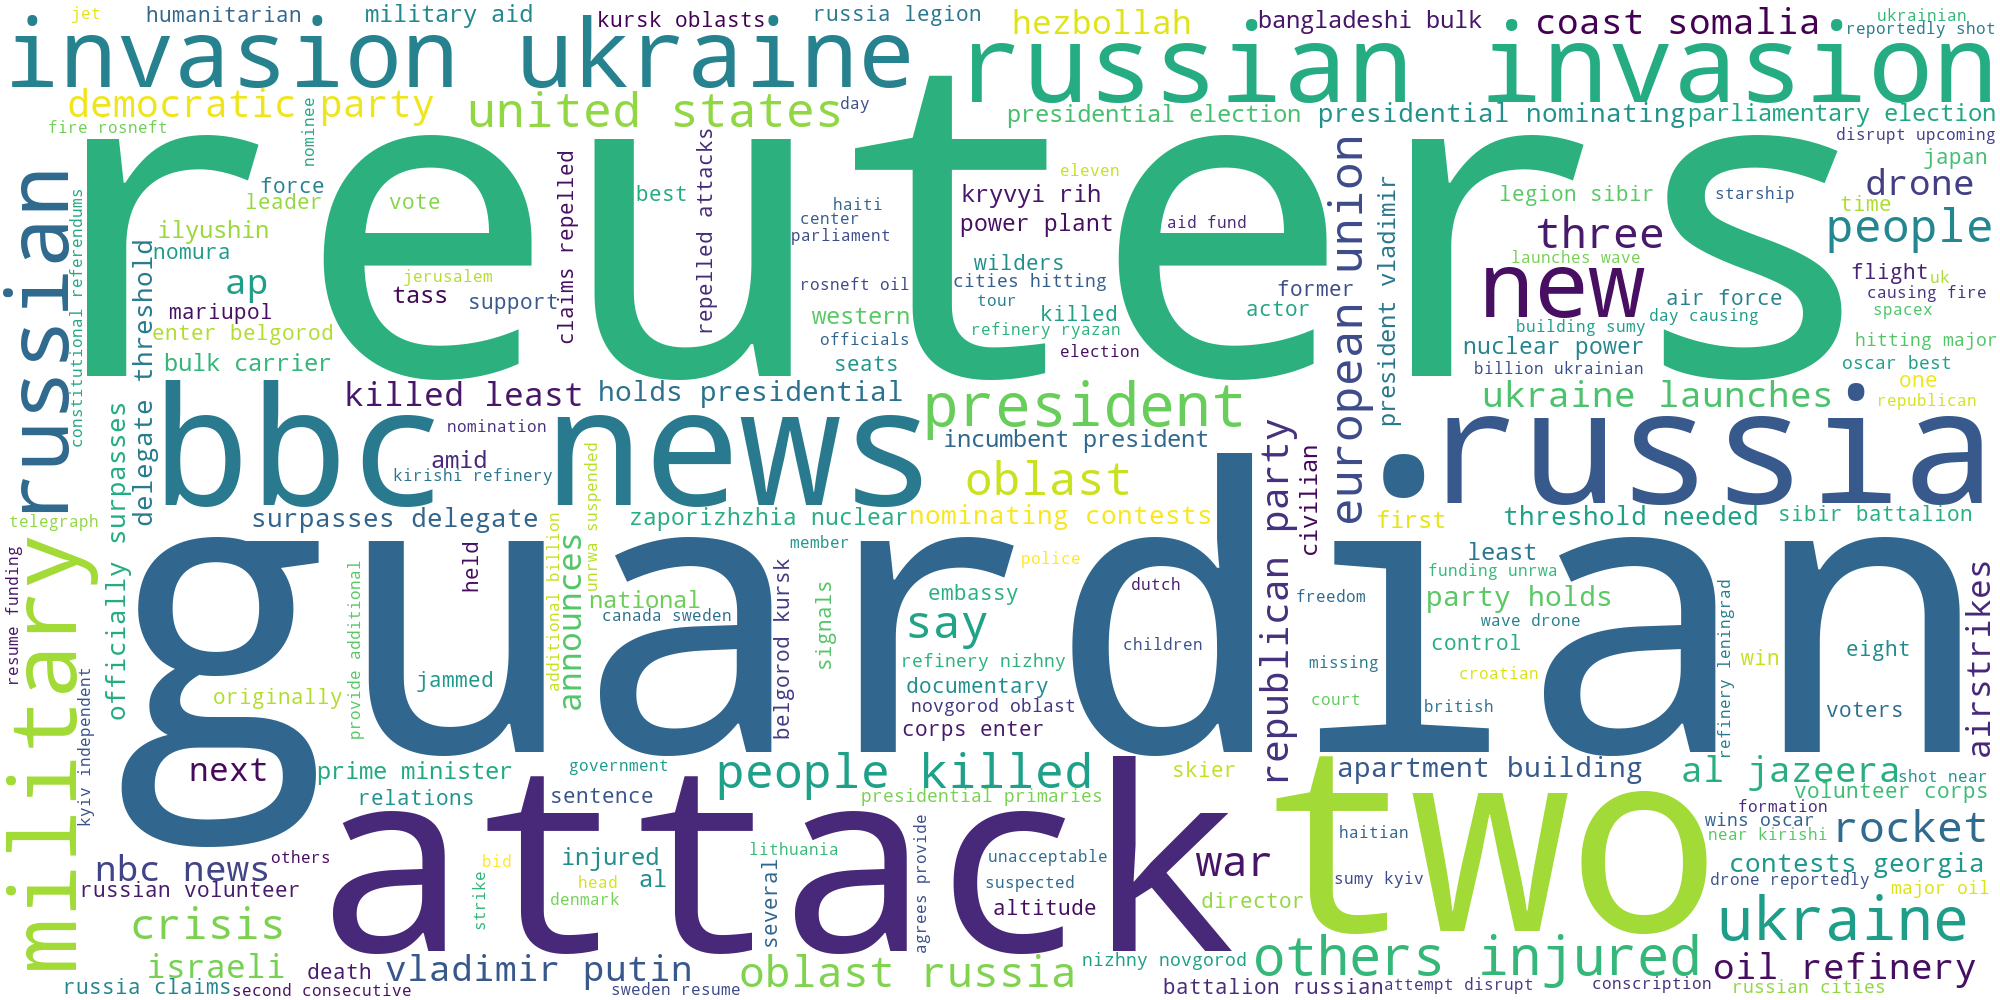

In [72]:
from IPython.display import Image
Image(filename='word_cloud_wiki_current_events.png') 